In [1]:
import math
import os
import gc
import re
import sys
import time
import json
import random
import datetime
import traceback
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

In [3]:
def cal_log_avg_div(_x, _y):
    value = 0
    for i in range(0,len(_x)):
        x = math.log(_x[i])
        y = math.log(_y[i])
        value = value+(x - y)**2
    value = math.sqrt(value/len(_x))
    return value
        
verify = pd.read_csv('../script/man.csv')
verify = verify.drop(['title','month'],axis=1)
verify['rate'] = abs(verify['new_sell_price'] - verify['price'])/verify['price']

part1 = verify.loc[(verify['id'] <= 100),:].reset_index(drop=True)
part2 = verify.loc[(verify['id'] > 100)&(verify['id'] <= 200),:].reset_index(drop=True)
part3 = verify.loc[(verify['id'] > 200)&(verify['id'] <= 300),:].reset_index(drop=True)
part4 = verify.loc[(verify['id'] > 300)&(verify['id'] <= 400),:].reset_index(drop=True)
print(len(part1.loc[(part1['rate'] <= 0.05),:]), cal_log_avg_div(list(part1.new_sell_price.values),list(part1.price.values) ), cal_log_avg_div(list(part1.eval_price.values),list(part1.price.values) ))
# print(len(part2.loc[(part2['rate'] <= 0.05),:]), cal_log_avg_div(list(part2.new_sell_price.values),list(part2.price.values) ), cal_log_avg_div(list(part2.eval_price.values),list(part2.price.values) ))
# print(len(part3.loc[(part3['rate'] <= 0.05),:]), cal_log_avg_div(list(part3.new_sell_price.values),list(part3.price.values) ), cal_log_avg_div(list(part3.eval_price.values),list(part3.price.values) ))
# print(len(part4.loc[(part4['rate'] <= 0.05),:]), cal_log_avg_div(list(part4.new_sell_price.values),list(part4.price.values) ), cal_log_avg_div(list(part4.eval_price.values),list(part4.price.values) ))

50 nan nan


In [ ]:
# 41 0.13848031859374452 0.09513803783207576
31 37 58 62 66 83 96


43 0.09838666415907328 0.04192800131119275
36 0.14894512455806674 0.13024161709387508
49 0.13577912771494724 0.13817367558620405
54 0.10639395374272057 0.061869255298302755

89 0.05123528740119322 0.04214654559904364
88 0.04421807882807862 0.12132464514939381
84 0.06273468268599895 0.13086277496292562
86 0.06950056841371427 0.06378912945087409

In [102]:
verify.loc[(verify['rate'] > 0.3)]

,id,origin_brand_name,origin_model_name,origin_detail_name,year,mile,condition,city,price,gpj_price,...,brand_name,model_name,detail_name,gpj_detail_slug,eval_price,online_year,control,new_sell_price,new_buy_price,rate
72,73,雪佛兰,爱唯欧,2011款 三厢 1.6L MT SX,2011,9.2,good,苏州,1.9,3.0,...,雪佛兰,爱唯欧,2011款 三厢 1.6L MT SX,10149_ah,2.17,2011.0,手动,2.58,3.11,0.357895
277,278,菲亚特,菲翔,2012款 1.4T 手动畅享版,2013,13.1,fair,苏州,2.9,4.2,...,菲亚特,菲翔,2012款 1.4T 手动畅享版,13397_ah,4.20,2012.0,手动,4.31,4.94,0.486207


In [2]:
# train_temp = pd.read_csv('../tmp/train/train_temp_手动.csv', low_memory=False)
train_temp = pd.read_csv('../tmp/train/train.csv', low_memory=False)
train_temp = train_temp.drop(['url','labels','price_bn','energy','cos_similar','brand_slug','model_slug','domain','body','volume','sold_time','create_time'],axis=1)
global_model_mean = pd.read_csv('../tmp/train/global_model_mean.csv')
global_model_mean = global_model_mean.loc[:, ['detail_slug','detail_model_slug']].rename(columns={'detail_model_slug':'gpj_detail_slug'})
train_temp = train_temp.merge(global_model_mean,how='left',on=['detail_slug'])

In [3]:
gpj_detail_slug = 'car_autohome_detail_28878'
test = train_temp.loc[(train_temp['gpj_detail_slug'] == gpj_detail_slug)&(train_temp['type'] == 'personal'),:].reset_index(drop=True)
print(np.median(test.price.values),np.median(test.loc[(test['online_year'] == test['year']),'price'].values))
test

nan nan


/home/ml/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ml/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,origin_name,brand_name,model_name,detail_name,detail_slug,online_year,control,year,month,mile,city,price,type,gpj_detail_slug


In [32]:
test = train_temp.loc[(train_temp['gpj_detail_slug'] == gpj_detail_slug)&(train_temp['type'] == 'sell'),:].reset_index(drop=True)
print(np.median(test.price.values),np.median(test.loc[(test['online_year'] == test['year']),'price'].values))
test

nan nan


/home/ml/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ml/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,origin_name,brand_name,model_name,detail_name,detail_slug,online_year,control,year,month,mile,city,price,type,gpj_detail_slug


In [55]:
#--------------------
# 1.高低配异常(低配异常,高配正常)
# 2.同龄整体异常

8.5

In [32]:
import json
import requests
response = requests.get(url='http://openapi.gongpingjia.com/api/modeldetail/lastupdated/?page_size=100&page=327&start_time=all')
text = json.loads(response.text)
result = pd.DataFrame(text['data'])
result

,brand,control,delisted_year,detail_model,detail_model_slug,emission_standard,gpj_id,listed_year,model,price_bn,update_time,volume
0,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,手动,None,2019款 1.5T 手动优享型 7座,car_autohome_detail_37514,国5,314060,2019,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,8.19,2019-03-26 19:05:24,1.5
1,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,自动,None,2019款 1.5T 自动坦途版,car_autohome_detail_36713,国5,314083,2018,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,12.79,2019-03-26 19:05:24,1.5
2,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,自动,None,2018款 1.5T 自动标准运动型 7座,car_autohome_detail_33045,国5,314031,2018,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,9.39,2019-03-26 19:05:24,1.5
3,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,手动,None,2019款 1.5T 手动优享型 6座,car_autohome_detail_37513,国5,314059,2019,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,8.19,2019-03-26 19:05:24,1.5
4,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,自动,None,2018款 1.5T 自动舒适运动型 7座,car_autohome_detail_33046,国5,314032,2018,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,9.89,2019-03-26 19:05:24,1.5
5,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,自动,None,2019款 1.5T 自动优享型 7座,car_autohome_detail_37522,国5,314068,2019,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,9.69,2019-03-26 19:05:24,1.5
6,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,自动,None,2018款 1.5T 自动标准型 7座,car_autohome_detail_33076,国5,314033,2018,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,9.39,2019-03-26 19:05:24,1.5
7,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,手动,None,2019款 1.5T 手动优享型 5座,car_autohome_detail_37490,国5,314051,2019,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,7.99,2019-03-26 19:05:24,1.5
8,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,自动,None,2018款 1.5T 自动标准型 5座,car_autohome_detail_34307,国5,314037,2018,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,9.39,2019-03-26 19:05:24,1.5
9,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,自动,None,2018款 1.5T 自动舒适型 7座,car_autohome_detail_33077,国5,314034,2018,{'logo_img': 'http://gongpingjia.qiniudn.com/i...,9.89,2019-03-26 19:05:24,1.5


In [13]:
train = pd.read_csv('../tmp/train/train_temp.csv')
# 根据款型计算中位数
median_price = train.groupby(['brand_slug', 'brand_name', 'model_slug', 'model_name', 'detail_slug', 'online_year', 'price_bn', 'year'])['price'].median().reset_index().rename(columns={'price': 'median_price'})
median_price = median_price.sort_values(by=['brand_slug', 'model_slug', 'online_year', 'price_bn']).reset_index(drop=True)
median_price['warehouse_year'] = median_price['year'] - median_price['online_year']

# 根据年限,统计上牌年份的价格差
detail_year = median_price.loc[:, ['detail_slug', 'online_year']]
detail_year = detail_year.drop_duplicates(['detail_slug', 'online_year']).reset_index(drop=True)

count = 0
result = pd.DataFrame([], columns=['detail_slug', 'median_price', 'online_year', 'warehouse_year', 'price_div'])
for detail_slug, online_year in detail_year.loc[:, ['detail_slug', 'online_year']].values:
    temp = median_price.loc[(median_price['detail_slug'] == detail_slug) & (median_price['online_year'] == online_year), :].reset_index(drop=True)
    if (len(temp) <= 1) | (len(temp.loc[(temp['warehouse_year'] == 0), :]) == 0):
        continue
    temp_median_price = temp.loc[(temp['warehouse_year'] == 0), 'median_price'].values[0]
    for i in range(0, len(temp)):
        price_div = temp.loc[i, 'median_price'] - temp_median_price
        warehouse_year = temp.loc[i, 'warehouse_year']
        result.loc[count, ['detail_slug', 'median_price', 'online_year', 'warehouse_year', 'price_div']] = [detail_slug, temp_median_price, online_year, warehouse_year, price_div]
        count = count + 1
result['rate'] = result['price_div'] / result['median_price']

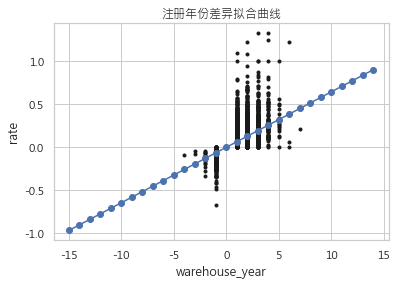

In [16]:
from scipy.optimize import leastsq
def func_no_b(a, x):
    """
    拟合函数
    """
    k = a
    return k * x


def dist_no_b(a, x, y):
    """
    残差
    """
    return func_no_b(a, x) - y


param = [0]
var = leastsq(dist_no_b, param, args=(np.array(list(result.warehouse_year.values)), np.array(list(result.rate.values))))
k = var[0][0]
        

test = result.copy()
part1 = test.loc[(test['warehouse_year'] >= 0)&(test['rate'] >= 0),:]
part2 = test.loc[(test['warehouse_year'] < 0)&(test['rate'] < 0),:]
test = part1.append(part2, sort=False).reset_index(drop=True)

plt.figure()
plt.title(u'注册年份差异拟合曲线')
plt.xlabel(u'warehouse_year')
plt.ylabel(u'rate')
plt.grid(True)
x = list(test.warehouse_year.values)
y = list(test.rate.values)
plt.plot(x, y, 'k.')

x = range(-15,15)
y = [k * i for i in range(-15,15)]
plt.plot(x, y, 'o-')

In [21]:
train = pd.read_csv('../tmp/train/train.csv',low_memory=False)
train = train.drop(['url'],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150779 entries, 0 to 150778
Data columns (total 24 columns):
origin_name    150779 non-null object
brand_name     150779 non-null object
model_name     150779 non-null object
detail_name    150779 non-null object
cos_similar    150779 non-null float64
brand_slug     150779 non-null float64
model_slug     150779 non-null float64
detail_slug    150779 non-null float64
online_year    150779 non-null float64
energy         150779 non-null object
body           150779 non-null object
control        150779 non-null object
volume         150779 non-null float64
year           150779 non-null float64
month          150779 non-null float64
mile           150779 non-null float64
city           150779 non-null object
price_bn       150779 non-null float64
price          150779 non-null float64
create_time    150779 non-null object
domain         150779 non-null object
labels         138453 non-null object
sold_time      12326 non-null object
type 

In [141]:
global_model_mean = pd.read_csv('../tmp/train/global_model_mean.csv',low_memory=False)
car_autohome_all = pd.read_csv('../tmp/train/car_autohome_all.csv',low_memory=False)
global_model_mean = global_model_mean.merge(car_autohome_all.loc[:, ['detail_slug','control']],how='left',on=['detail_slug'])
global_model_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32672 entries, 0 to 32671
Data columns (total 17 columns):
detail_slug          32672 non-null int64
brand_name           32672 non-null object
brand_slug           32672 non-null int64
model_name           32672 non-null object
model_slug           32672 non-null int64
detail_name          32672 non-null object
manufacturer         32672 non-null object
price_bn             32672 non-null float64
body                 32672 non-null object
energy               32672 non-null object
listed_year          32672 non-null int64
online_year          32672 non-null int64
used_years           32672 non-null int64
median_price         32672 non-null float64
detail_model_slug    32672 non-null object
update_time          32672 non-null object
control              32672 non-null object
dtypes: float64(2), int64(6), object(9)
memory usage: 4.5+ MB


In [142]:
global_model_mean.to_csv('../tmp/train/global_model_mean.csv',index=False)

In [56]:
# coding=utf-8
import os
import re
import sys
import json
import math
import random
import datetime
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

ENCODING = 'utf-8'
PRODUCE_DB_ADDR_OUTTER = '10.45.138.200'
PRODUCE_DB_USER = 'pingjia'
PRODUCE_DB_PASSWD = 'De32wsxC'
PRODUCE_USED_CAR_ESTIMATE_ENGINE = 'mysql+pymysql://'+PRODUCE_DB_USER+':'+PRODUCE_DB_PASSWD+'@'+PRODUCE_DB_ADDR_OUTTER+'/china_used_car_estimate?charset=utf8'
engine = create_engine(PRODUCE_USED_CAR_ESTIMATE_ENGINE, encoding=ENCODING)

##########################################################
# combine_brand = pd.read_csv('./combine_brand.csv')
# combine_model = pd.read_csv('./combine_model.csv')
# combine_brand = combine_brand.drop(['car_autohome_brand_id'], axis=1)
# combine_model = combine_model.drop(['car_autohome_model_id'], axis=1)

# base_standard_open_category = combine_brand.append(combine_model, sort=False).reset_index(drop=True)
# base_standard_open_category = base_standard_open_category.sort_values(by=['id']).reset_index(drop=True)

# with engine.begin() as con:
#     sql = 'delete from base_standard_open_category where on_sale=1 '
#     con.execute(sql)
#     con.execute('commit')
# con.close()
# base_standard_open_category.to_sql(name='base_standard_open_category', if_exists='append', con=engine, index=False)

##########################################################
def process_emission_standard(df):
    if (str(df['emission_standard']) == 'nan') or (str(df['emission_standard']) == '-'):
        return np.NAN
    text = df['emission_standard'].lower()
    if len(re.findall('vii',text)) > 0:
        return df['emission_standard'][0]+'7'
    elif len(re.findall('vi',text)) > 0:
        return df['emission_standard'][0]+'6'
    elif len(re.findall('iv',text)) > 0:
        return df['emission_standard'][0]+'4'
    elif len(re.findall('v',text)) > 0:
        return df['emission_standard'][0]+'5'
    elif len(re.findall('iii',text)) > 0:
        return df['emission_standard'][0]+'3'
    elif len(re.findall('ii',text)) > 0:
        return df['emission_standard'][0]+'2'
    elif len(re.findall('i',text)) > 0:
        return df['emission_standard'][0]+'1'
    return df['emission_standard'][0]+df['emission_standard'][1]

combine_detail = pd.read_csv('./combine_detail.csv')

open_model_detail = pd.read_csv('./open_model_detail.csv')
open_model_detail = open_model_detail.loc[~(open_model_detail['model_detail_slug'].isin(list(set(combine_detail.detail_model_slug.values)))), :]
open_model_detail = open_model_detail.rename(columns={'model_detail_slug': 'detail_model_slug'})
open_model_detail['status'] = 'D'
combine_detail = combine_detail.append(open_model_detail, sort=False)
combine_detail = combine_detail.sort_values(by=['id']).reset_index(drop=True)
combine_detail['emission_standard'] = combine_detail.apply(process_emission_standard, axis=1)
combine_detail = combine_detail.drop(['car_autohome_detail_id'], axis=1)

with engine.begin() as con:
    sql = 'delete from base_standard_open_model_detail where created_on < \''+  datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") +'\' '
    con.execute(sql)
    con.execute('commit')
con.close()
combine_detail.to_sql(name='base_standard_open_model_detail', if_exists='append', con=engine, index=False)

##########################################################
# global_model_mean = pd.read_csv('./global_model_mean.csv')
# global_model_mean = global_model_mean.drop(['listed_year'], axis=1)

# with engine.begin() as con:
#     sql = 'delete from valuate_global_model_mean where update_time < \''+  datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") +'\' '
#     con.execute(sql)
#     con.execute('commit')
# con.close()
# global_model_mean.to_sql(name='valuate_global_model_mean', if_exists='append', con=engine, index=False)

8.5


,source_id,origin_name,year,month,mile,price,city,domain,transfer_owner,title,brand_slug,model_slug,detail_slug,online_year,price_bn,brand_name,model_name,detail_name,province
38026,3007175003,纳智捷 优6 SUV 2017款 1.8T 时尚升级型,2017,4.0,2.2,7.58,新余,guazi.com,0.0,纳智捷优6suv2017款1.8t时尚升级型,130.0,3293.0,27968.0,2017.0,14.98,纳智捷,优6 SUV,2017款 1.8T 时尚升级型,江西
38027,3006683767,纳智捷 优6 SUV 2017款 1.8T 时尚升级型,2017,5.0,3.5,7.98,泸州,guazi.com,0.0,纳智捷优6suv2017款1.8t时尚升级型,130.0,3293.0,27968.0,2017.0,14.98,纳智捷,优6 SUV,2017款 1.8T 时尚升级型,四川
38028,3008161100,纳智捷 优6 SUV 2017款 1.8T 时尚升级型,2017,3.0,4.4,8.00,上海,guazi.com,0.0,纳智捷优6suv2017款1.8t时尚升级型,130.0,3293.0,27968.0,2017.0,14.98,纳智捷,优6 SUV,2017款 1.8T 时尚升级型,上海
38029,3005689420,纳智捷 优6 SUV 2017款 1.8T 时尚升级型,2017,5.0,2.0,9.60,宿州,guazi.com,0.0,纳智捷优6suv2017款1.8t时尚升级型,130.0,3293.0,27968.0,2017.0,14.98,纳智捷,优6 SUV,2017款 1.8T 时尚升级型,安徽
38030,3008221868,纳智捷 优6 SUV 2017款 1.8T 时尚升级型,2017,5.0,2.1,10.00,商丘,guazi.com,0.0,纳智捷优6suv2017款1.8t时尚升级型,130.0,3293.0,27968.0,2017.0,14.98,纳智捷,优6 SUV,2017款 1.8T 时尚升级型,河南
38031,3007523112,纳智捷 优6 SUV 2017款 1.8T 时尚升级型,2017,2.0,2.3,8.50,宜宾,guazi.com,0.0,纳智捷优6suv2017款1.8t时尚升级型,130.0,3293.0,27968.0,2017.0,14.98,纳智捷,优6 SUV,2017款 1.8T 时尚升级型,四川
38032,3008052939,纳智捷 优6 SUV 2017款 1.8T 时尚升级型,2017,4.0,3.0,9.98,杭州,guazi.com,0.0,纳智捷优6suv2017款1.8t时尚升级型,130.0,3293.0,27968.0,2017.0,14.98,纳智捷,优6 SUV,2017款 1.8T 时尚升级型,浙江


In [15]:
car_autohome_all = pd.read_csv('../tmp/train/car_autohome_all.csv')
car_autohome_all.loc

,detail_slug,brand_name,brand_slug,model_name,model_slug,detail_name,manufacturer,price_bn,body,energy,volume_extend,emission_standard,listed_year,online_year,volume,control
0,454,大众,1,宝来/宝来经典,15,2004款 1.6 手动基本,一汽-大众,13.50,紧凑型车,汽油,L,欧II,2003,2004,1.6,手动
1,456,大众,1,宝来/宝来经典,15,2004款 1.6 自动基本,一汽-大众,14.70,紧凑型车,汽油,L,欧II,2003,2004,1.6,自动
2,466,大众,1,宝来/宝来经典,15,2004款 1.6 自动天窗,一汽-大众,15.88,紧凑型车,汽油,L,欧II,2003,2004,1.6,自动
3,516,大众,1,宝来/宝来经典,15,2004款 1.8 手动尊贵,一汽-大众,19.39,紧凑型车,汽油,L,欧III,2003,2004,1.8,手动
4,518,大众,1,宝来/宝来经典,15,2004款 1.8 自动尊贵,一汽-大众,20.69,紧凑型车,汽油,L,欧III,2003,2004,1.8,自动


In [16]:
list(set(car_autohome_all.body.values))

['中型车',
 'MPV',
 '紧凑型SUV',
 '中大型车',
 '小型SUV',
 '皮卡',
 '微型车',
 '跑车',
 '轻客',
 '中型SUV',
 '中大型SUV',
 '大型SUV',
 '微卡',
 '小型车',
 '微面',
 '紧凑型车',
 '大型车']

In [ ]:
plt.figure()
plt.title(u'注册年份差异拟合曲线')
plt.xlabel(u'warehouse_year')
plt.ylabel(u'rate')
plt.grid(True)
x = list(test.warehouse_year.values)
y = list(test.rate.values)
plt.plot(x, y, 'k.')

k = div_warehouse_k_param.loc[0, 'k']
x = range(-15,15)
y = [k * i for i in range(-15,15)]
plt.plot(x, y, 'o-')

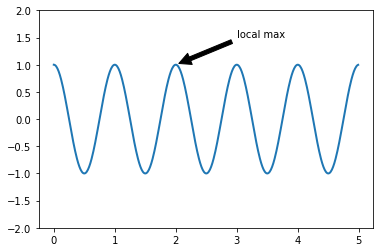

In [28]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

In [8]:
from sqlalchemy import create_engine

PRODUCE_DB_ADDR_OUTTER = '101.201.143.74'
PRODUCE_DB_USER = 'leidengjun'
PRODUCE_DB_PASSWD = 'ldj_DEV_~!'
PRODUCE_PINGJIA_ENGINE = 'mysql+pymysql://' + PRODUCE_DB_USER + ':' + PRODUCE_DB_PASSWD + '@' + PRODUCE_DB_ADDR_OUTTER + '/pingjia?charset=utf8'
PRODUCE_DATASOURCE_ENGINE = 'mysql+pymysql://' + PRODUCE_DB_USER + ':' + PRODUCE_DB_PASSWD + '@' + PRODUCE_DB_ADDR_OUTTER + '/datasource?charset=utf8'

query_sql = 'select od.name,arr.domain,arr.add_date,arr.条数 from (select domain,add_date,count(d_model) as 条数 from pingjia.api_request_record where `time` > \'2018-10-19\' group by domain,add_date) arr \
                left join pingjia.open_domainlist od on od.domain = arr.domain'

engine = create_engine(PRODUCE_PINGJIA_ENGINE, encoding='utf-8')

data = pd.read_sql_query(query_sql, engine)
data.to_csv('../tmp/train/man.csv', index=False)

In [11]:
data = data.sort_values(by=['domain','add_date'])
data.to_csv('../tmp/train/man.csv', index=False)

In [17]:
open_model_detail = pd.read_csv('../tmp/train/open_model_detail.csv')
combine_detail = pd.read_csv('../tmp/train/combine_detail.csv') 
open_model_detail = open_model_detail.loc[~(open_model_detail['model_detail_slug'].isin(list(set(combine_detail.detail_model_slug.values)))), :]
open_model_detail = open_model_detail.rename(columns={'model_detail_slug':'detail_model_slug'})
open_model_detail['status'] = 'D'
combine_detail = combine_detail.append(open_model_detail, sort=False)
combine_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46457 entries, 0 to 38699
Data columns (total 26 columns):
id                        38706 non-null float64
source_id                 22877 non-null float64
checker_runtime_id        18677 non-null float64
old_dmodel                27078 non-null object
detail_model              46457 non-null object
detail_model_slug         46457 non-null object
price_bn                  46457 non-null float64
cont_vprice               32981 non-null float64
url                       18677 non-null object
global_slug               46457 non-null object
domain                    38706 non-null object
status                    46457 non-null object
year                      46457 non-null int64
has_param                 46457 non-null object
volume                    46457 non-null float64
vv                        32678 non-null float64
listed_year               46457 non-null int64
delisted_year             20466 non-null float64
control              

/home/ml/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
combine_detail = combine_detail.drop_duplicates(['detail_model_slug'])
combine_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46457 entries, 0 to 38699
Data columns (total 26 columns):
id                        38706 non-null float64
source_id                 22877 non-null float64
checker_runtime_id        18677 non-null float64
old_dmodel                27078 non-null object
detail_model              46457 non-null object
detail_model_slug         46457 non-null object
price_bn                  46457 non-null float64
cont_vprice               32981 non-null float64
url                       18677 non-null object
global_slug               46457 non-null object
domain                    38706 non-null object
status                    46457 non-null object
year                      46457 non-null int64
has_param                 46457 non-null object
volume                    46457 non-null float64
vv                        32678 non-null float64
listed_year               46457 non-null int64
delisted_year             20466 non-null float64
control              

In [12]:
open_model_detail.loc[(open_model_detail['model_detail_slug'] == 'm13561_ba'),:]

,id,source_id,checker_runtime_id,old_dmodel,detail_model,model_detail_slug,price_bn,cont_vprice,url,global_slug,...,vv,listed_year,delisted_year,control,emission_standard,volume_extend,simple_model,continuity_id,body_model,created_on
8835,77825,64609.0,1385513.0,2011款 凯美瑞 240V Navi 至尊导航版,2011款 2.4L 240V 至尊导航版,m13561_ba,27.38,27.38,http://car.bitauto.com/kaimeirui/m13561/peizhi/,kaimeirui,...,2.4,2010,2014.0,自动,国3,L,至尊导航版,5706.0,三厢,2017-04-20 17:10:23


In [13]:
combine_detail.loc[(combine_detail['detail_model_slug'] == 'm13561_ba'),:]

,id,source_id,checker_runtime_id,old_dmodel,detail_model,detail_model_slug,price_bn,cont_vprice,url,global_slug,...,listed_year,delisted_year,control,emission_standard,volume_extend,simple_model,continuity_id,body_model,created_on,car_autohome_detail_id


In [38]:
open_model_detail = pd.read_csv('../tmp/train/open_model_detail.csv')
open_model_detail = open_model_detail.loc[(open_model_detail['status'] == 'Y'),:]
combine_brand = pd.read_csv('../tmp/train/combine_brand.csv')
combine_brand = combine_brand.loc[:, ['name','slug']].rename(columns={'name':'brand_name','slug':'parent'})
combine_model = pd.read_csv('../tmp/train/combine_model.csv')
combine_model = combine_model.loc[:, ['name','slug','parent','mum']].rename(columns={'name':'model_name','slug':'global_slug'})
combine_model = combine_model.merge(combine_brand,how='left',on=['parent'])
combine_detail = pd.read_csv('../tmp/train/combine_detail.csv')
combine_detail = combine_detail.merge(combine_model.loc[:, ['parent','global_slug']],how='left',on=['global_slug'])
combine_detail = combine_detail.loc[(combine_detail['id'].isin(list(open_model_detail.id.values))), :]

def process_date(df):
    used_years = datetime.datetime.now().year - df['year']
    if used_years < 0:
        return pd.Series([0, datetime.datetime.now().month])
    return pd.Series([used_years, 3])

def process_mile(df):
    if df['used_years'] == 0:
        return 0.5
    return df['used_years'] * 2

wait_predict = combine_detail.loc[(combine_detail['id'].notnull()),:]
detail_2018 = wait_predict.loc[(wait_predict['year'] == 2018), :].reset_index(drop=True)
detail_2018 = detail_2018.loc[detail_2018.groupby(['parent','global_slug', 'year']).price_bn.idxmin(), :].reset_index(drop=True)
detail_2017 = wait_predict.loc[(wait_predict['year'] == 2017), :].reset_index(drop=True)
detail_2017 = detail_2017.loc[detail_2017.groupby(['parent','global_slug', 'year']).price_bn.idxmin(), :].reset_index(drop=True)
detail_2016 = wait_predict.loc[(wait_predict['year'] == 2016), :].reset_index(drop=True)
detail_2016 = detail_2016.loc[detail_2016.groupby(['parent','global_slug', 'year']).price_bn.idxmin(), :].reset_index(drop=True)

combine_detail = detail_2018.append(detail_2017,sort=False).reset_index(drop=True)
combine_detail = combine_detail.append(detail_2016,sort=False).reset_index(drop=True)
sampler = np.random.permutation(len(combine_detail))
sampler = sampler[0:99]
combine_detail = combine_detail.take(sampler).reset_index(drop=True)

cities = ['北京','上海','深圳','成都','杭州','苏州']
combine_detail = combine_detail.loc[:, ['detail_model','global_slug','detail_model_slug','price_bn','year']]
city = []
for i in range(0, int(len(combine_detail)/len(cities))):
    city.extend(cities)
combine_detail['city'] = pd.Series(city)
combine_detail['city'] = combine_detail['city'].fillna('成都')
combine_detail['used_years'] = np.NaN
combine_detail['month'] = np.NaN
combine_detail['mile'] = np.NaN
combine_detail[['used_years','month']] = combine_detail.apply(process_date, axis=1)
combine_detail.loc[(combine_detail['year'] > datetime.datetime.now().year), 'year'] = datetime.datetime.now().year
combine_detail['mile'] = combine_detail.apply(process_mile, axis=1)
combine_detail = combine_detail.merge(combine_model, how='left', on=['global_slug'])
combine_detail = combine_detail.loc[:, ['brand_name','model_name','mum','detail_model','detail_model_slug','price_bn','city','year','month','mile']]
combine_detail.head()

,brand_name,model_name,mum,detail_model,detail_model_slug,price_bn,city,year,month,mile
0,启辰,启辰T70X,东风日产,2016款 2.0L 手动 睿享运动版,111835_autotis,11.68,北京,2016,3,4.0
1,标致,标致5008,东风标致,2017款 1.6T 350THP 领先版5座,120256_autotis,18.77,上海,2017,3,2.0
2,阿尔法罗密欧,阿尔法罗密欧Giulia,阿尔法罗密欧,2017款 2.0T 200HP 精英版,119871_autotis,31.98,深圳,2017,3,2.0
3,金杯,金杯T52,华晨金杯,2017款 1.5L 手动 创业型单轮,119063_autotis,4.88,成都,2017,3,2.0
4,捷豹,捷豹XFL,奇瑞捷豹路虎,2018款 2.0T 200PS 风华版,126498_autotis,38.58,杭州,2018,3,0.5


In [2]:
global_model_mean = pd.read_csv('../tmp/train/global_model_mean.csv')
global_model_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34043 entries, 0 to 34042
Data columns (total 15 columns):
detail_slug          34043 non-null int64
brand_name           34043 non-null object
brand_slug           34043 non-null int64
model_name           34043 non-null object
model_slug           34043 non-null int64
detail_name          34043 non-null object
manufacturer         34043 non-null object
price_bn             34043 non-null float64
body                 34043 non-null object
energy               34043 non-null object
online_year          34043 non-null int64
used_years           34043 non-null int64
median_price         34043 non-null float64
listed_year          11375 non-null float64
detail_model_slug    34043 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 3.9+ MB


In [3]:
test = global_model_mean.drop_duplicates(['detail_model_slug'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34043 entries, 0 to 34042
Data columns (total 15 columns):
detail_slug          34043 non-null int64
brand_name           34043 non-null object
brand_slug           34043 non-null int64
model_name           34043 non-null object
model_slug           34043 non-null int64
detail_name          34043 non-null object
manufacturer         34043 non-null object
price_bn             34043 non-null float64
body                 34043 non-null object
energy               34043 non-null object
online_year          34043 non-null int64
used_years           34043 non-null int64
median_price         34043 non-null float64
listed_year          11375 non-null float64
detail_model_slug    34043 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 4.2+ MB
